In [1]:
import numpy as np
import pandas as pd
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets
import matplotlib.pyplot as plt

Part 1A:

In [11]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
K = [2, 10, 50]
tr_loss_a = []
va_loss_a = []
params_a = []

for k in K:
        model = CollabFilterOneVectorPerItem(
                n_epochs=10, batch_size=10000, step_size=0.1,
                n_factors=k, alpha=0.0)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple) 
        tr_loss_a.append(model.trace_mae_train)
        va_loss_a.append(model.trace_mae_valid)
        params_a.append(model.param_dict)


U [[-6.13353081e-04  8.76560892e-04]
 [-1.66883136e-04  1.08523184e-04]
 [ 1.80042001e-03 -4.58021156e-05]
 ...
 [ 3.62364037e-04  4.83832178e-04]
 [-1.08424801e-03  1.28658143e-03]
 [-3.10779689e-04  4.32924500e-04]]
loss total Autograd ArrayBox with value 1.566900031038455
epoch       0.000 | loss_total     0.00016 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00011 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
loss total Autograd ArrayBox with value 1.550688617163513
epoch       0.143 | loss_total     0.00016 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00010 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
loss total Autograd ArrayBox with value 1.5375772226092772
epoch       0.286 | loss_total     0.00015 | train_MAE     1.00261 | valid_MAE     1.00800 | grad_wrt_mu     0.00011 | grad_wrt_b_per_use

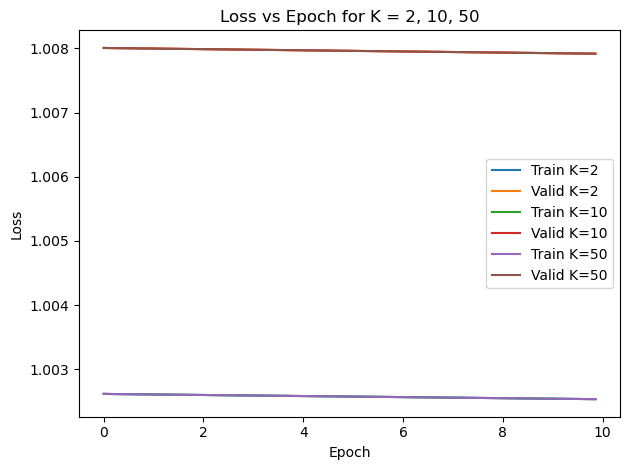

In [21]:
# Plotting K = 2, 10, 50
for i in range(len(K)):
    plt.plot(model.trace_epoch, tr_loss_a[i], label= 'Train K=' + str(K[i]))
    plt.plot(model.trace_epoch, va_loss_a[i], label= 'Valid K=' + str(K[i]))
plt.legend()
plt.title(label='Loss vs Epoch for K = 2, 10, 50')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()


Part 1B: 

In [4]:
# Training model with K=50 and various alpha > 0
K = 50
alphas = np.linspace(0.01, 10, 20)
tr_loss_b = []
va_loss_b = []
params_b = []

for alpha in alphas:
        model = CollabFilterOneVectorPerItem(
                n_epochs=10, batch_size=10000, step_size=0.1,
                n_factors=2, alpha=alpha)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple) 
        tr_loss_b.append(model.trace_mae_train)
        va_loss_b.append(model.trace_mae_valid)
        params_b.append(model.param_dict)
        
        

U [[-6.13353081e-04  8.76560892e-04]
 [-1.66883136e-04  1.08523184e-04]
 [ 1.80042001e-03 -4.58021156e-05]
 ...
 [ 3.62364037e-04  4.83832178e-04]
 [-1.08424801e-03  1.28658143e-03]
 [-3.10779689e-04  4.32924500e-04]]
loss total Autograd ArrayBox with value 1.5669551772389156
epoch       0.000 | loss_total     0.00016 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00011 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
loss total Autograd ArrayBox with value 1.5507437633419088
epoch       0.143 | loss_total     0.00016 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00010 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
loss total Autograd ArrayBox with value 1.5376323687656404
epoch       0.286 | loss_total     0.00015 | train_MAE     1.00261 | valid_MAE     1.00800 | grad_wrt_mu     0.00011 | grad_wrt_b_per_u

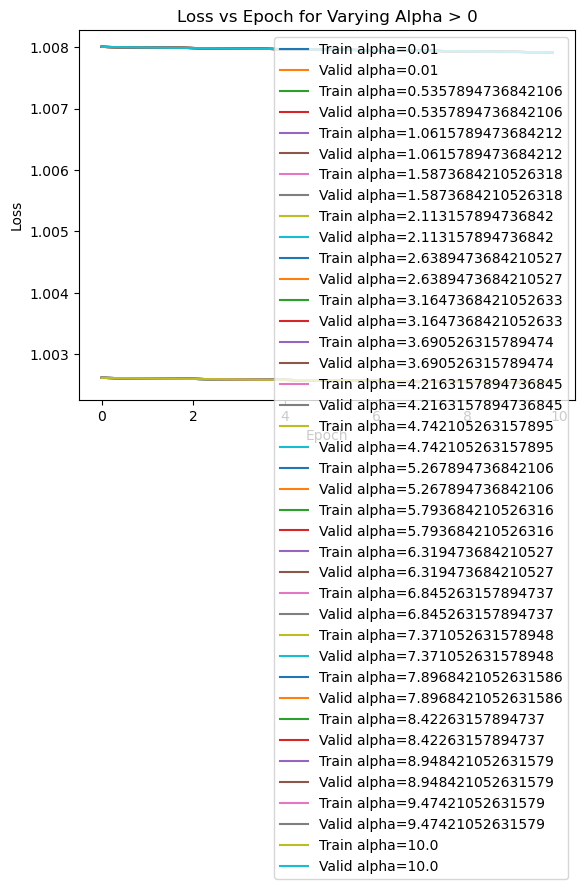

In [23]:
# Plotting varying alpha > 0
for i in range(20):
    plt.plot(model.trace_epoch, tr_loss_b[i], label= 'Train alpha=' + str(alphas[i]))
    plt.plot(model.trace_epoch, va_loss_b[i], label= 'Valid alpha=' + str(alphas[i]))
plt.legend()
plt.legend()
plt.title(label='Loss vs Epoch for Varying Alpha > 0')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Finding best alpha